In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
df = pd.read_csv("BNB-USD.csv")

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
df_Close = df[['Close']]
df_Close = df_Close.reset_index(drop=True)

In [6]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Close).reshape(-1, 1))

In [7]:
# Chia dữ liệu thành tập train và test dataset
train_size = int(0.7 * len(data_scaled))
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


In [8]:
pip install blosc2~=2.0.0

In [9]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


In [10]:
# Chuyển đổi định dạng dữ liệu cho auto_arima
y_train = train_data.flatten()

In [11]:
# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6499.218, Time=7.09 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6458.517, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6482.278, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6478.250, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6460.160, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6492.311, Time=3.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6486.531, Time=2.86 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6487.920, Time=2.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-6489.775, Time=3.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6484.917, Time=0.59 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-6489.096, Time=1.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6489.060, Time=0.41 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-6508.226, Time=4.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-6510.977, Time=4.34 sec
 ARIMA(4,1,2)(0,0,0

In [12]:
# Fit the model
model.fit(y_train)

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [13]:
# Dự đoán trên tập test
y_test = test_data.flatten()
y_pred = model.predict(n_periods=len(y_test))

In [14]:
# Chuyển đổi dữ liệu dự đoán và dữ liệu thực tế về tỷ lệ gốc
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1, 1))

In [15]:
# Tính toán các độ đo sai lệch
test_mape = mean_absolute_percentage_error(y_test_inverse, y_pred_inverse)
test_mse = mean_squared_error(y_test_inverse, y_pred_inverse)
test_rmse = np.sqrt(test_mse)

print(f"MAPE on Test dataset: {test_mape}")
print(f"RMSE on Test dataset: {test_rmse}")
print(f"MSE on Test dataset: {test_mse}")

MAPE on Test dataset: 0.26411341756609885
RMSE on Test dataset: 116.79261006937985
MSE on Test dataset: 13640.513766818207


**Predicting the next 30,60,90 days**

In [16]:
# Dự đoán 30, 60, 90 ngày tiếp theo từ 1/6
forecast_30_days = model.predict(n_periods=30)
forecast_60_days = model.predict(n_periods=60)
forecast_90_days = model.predict(n_periods=90)

In [17]:
# Chuyển đổi dự đoán về tỷ lệ gốc
forecast_30_days_inverse = scaler.inverse_transform(forecast_30_days.reshape(-1, 1))
forecast_60_days_inverse = scaler.inverse_transform(forecast_60_days.reshape(-1, 1))
forecast_90_days_inverse = scaler.inverse_transform(forecast_90_days.reshape(-1, 1))

In [18]:
print('Predicted closing prices for the next 30 days:')
print(forecast_30_days_inverse.flatten())

print('Predicted closing prices for the next 60 days:')
print(forecast_60_days_inverse.flatten())

print('Predicted closing prices for the next 90 days:')
print(forecast_90_days_inverse.flatten())

Predicted closing prices for the next 30 days:
[328.004539   328.0304516  329.20505072 329.41918613 327.94969075
 329.11360323 329.12835021 328.54732944 328.69808945 329.15873896
 328.6683747  328.72067461 328.97147275 328.83212748 328.70294681
 328.90596988 328.85414526 328.75841537 328.84005532 328.86771569
 328.78668432 328.82114649 328.85340353 328.81294231 328.81214148
 328.84287184 328.82365441 328.81459854 328.83274822 328.82884334]
Predicted closing prices for the next 60 days:
[328.004539   328.0304516  329.20505072 329.41918613 327.94969075
 329.11360323 329.12835021 328.54732944 328.69808945 329.15873896
 328.6683747  328.72067461 328.97147275 328.83212748 328.70294681
 328.90596988 328.85414526 328.75841537 328.84005532 328.86771569
 328.78668432 328.82114649 328.85340353 328.81294231 328.81214148
 328.84287184 328.82365441 328.81459854 328.83274822 328.82884334
 328.81796141 328.82757657 328.82920259 328.82166822 328.82488585
 328.82837315 328.82393187 328.82420831 328.827

In [19]:
# Tạo các chỉ số cho dữ liệu dự báo
train_dates = df.index[:train_size]
test_dates = df.index[train_size:]
# Ngày cho dự đoán
last_date = df.index[-1]
predict_dates_30 = pd.date_range(last_date + pd.Timedelta(days=1), periods=30, freq='D')
predict_dates_60 = pd.date_range(last_date + pd.Timedelta(days=1), periods=60, freq='D')
predict_dates_90 = pd.date_range(last_date + pd.Timedelta(days=1), periods=90, freq='D')

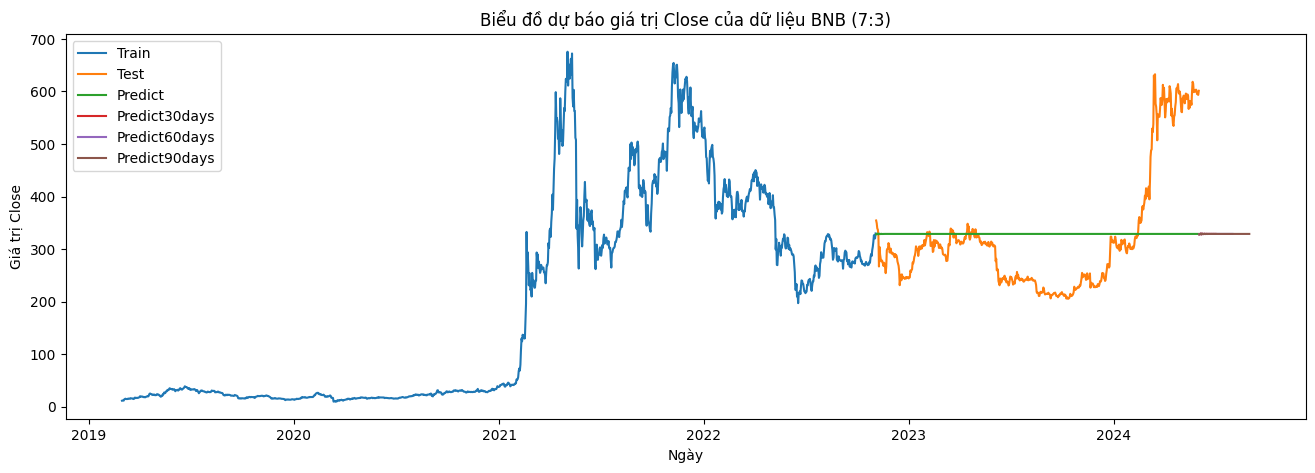

In [20]:
# Vẽ biểu đồ
plt.figure(figsize=(16, 5))

# Plotting training data
plt.plot(train_dates, scaler.inverse_transform(train_data), color='#1f77b4', linestyle='-', label='Train')

# Plotting test data
plt.plot(test_dates, y_test_inverse, color='#ff7f0e', linestyle='-', label='Test')

# Plotting predictions
plt.plot(test_dates, y_pred_inverse, color='#2ca02c', linestyle='-', label='Predict')

# Plotting 30-day forecast
plt.plot(predict_dates_30, forecast_30_days_inverse, color='#d62728', linestyle='-', label='Predict30days')

# Plotting 60-day forecast
plt.plot(predict_dates_60, forecast_60_days_inverse[:60], color='#9467bd', linestyle='-', label='Predict60days')

# Plotting 90-day forecast
plt.plot(predict_dates_90, forecast_90_days_inverse[:90], color='#8c564b', linestyle='-', label='Predict90days')

plt.legend()
plt.title("Biểu đồ dự báo giá trị Close của dữ liệu BNB (7:3)")
plt.xlabel("Ngày")
plt.ylabel("Giá trị Close")
plt.grid(False)
plt.savefig('ARIMA_BNB_73.png')
plt.show()